Analytics

In [11]:
import awswrangler as wr
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
session = boto3.Session(profile_name='arquitectura')
s3 = session.client('s3')

In [9]:
query = '''SELECT * FROM econ.unificadas'''

In [10]:
tbl_unificadas = wr.athena.read_sql_query(
    query, 
    database="econ", 
    ctas_approach=False,
    boto3_session=session
)
tbl_unificadas

,fecha,inflacion,tasa_de_interes,tipo_de_cambio
0,1992-11-01,12.64,9.21,1.53
1,1992-12-01,12.82,1.38,1.39
2,1993-01-01,12.98,9.21,1.52
3,1993-02-01,13.08,21.84,1.23
4,1993-03-01,13.16,47.55,1.04
...,...,...,...,...
2251,2023-10-01,131.00,24.08,-9.02
2252,2023-11-01,131.00,15.61,-10.43
2253,2023-12-01,132.00,12.55,-13.11
2254,2024-01-01,134.00,6.41,-8.68


Crear tres regresiones lineales: 1. tipo_de_cambio ~ tasa_de_interes

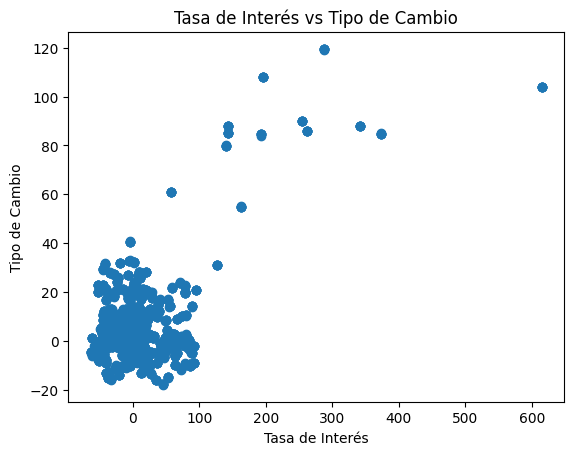

In [15]:
# Graficamos 'tasa_de_interes' vs 'tipo_de_cambio'
plt.scatter(tbl_unificadas['tasa_de_interes'], tbl_unificadas['tipo_de_cambio'])
plt.title('Tasa de Interés vs Tipo de Cambio')
plt.xlabel('Tasa de Interés')
plt.ylabel('Tipo de Cambio')
plt.show()

In [16]:
# Separamos datos en train y test sets
X = tbl_unificadas[['tasa_de_interes']]
y = tbl_unificadas['tipo_de_cambio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1304)

In [17]:
# Ajustamos modelos
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 226.5440427833754
R^2 Score: 0.3388698478347085


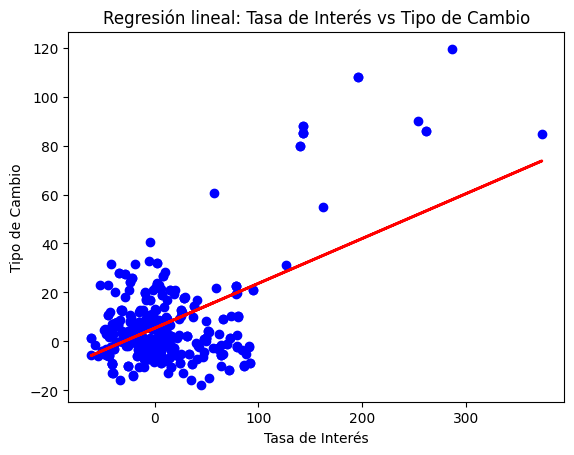

In [18]:
# Graficamos regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión lineal: Tasa de Interés vs Tipo de Cambio')
plt.xlabel('Tasa de Interés')
plt.ylabel('Tipo de Cambio')
plt.show()

Crear tres regresiones lineales: 2. tasa_de_interes ~ inflacion

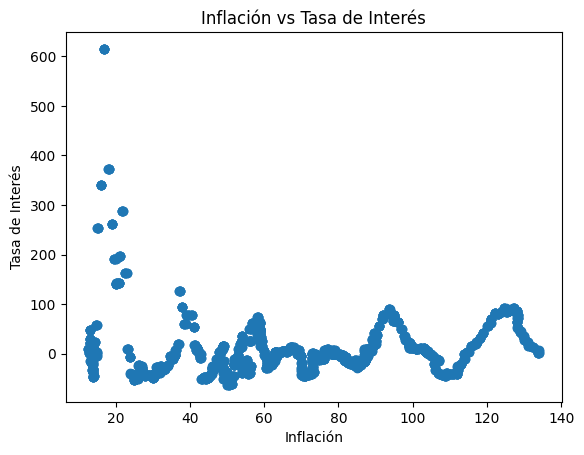

In [19]:
# Graficamos 'inflacion' vs 'tasa_de_interes'
plt.scatter(tbl_unificadas['inflacion'], tbl_unificadas['tasa_de_interes'])
plt.title('Inflación vs Tasa de Interés')
plt.xlabel('Inflación')
plt.ylabel('Tasa de Interés')
plt.show()

In [20]:
# Separamos datos en train y test sets
X = tbl_unificadas[['inflacion']]
y = tbl_unificadas['tasa_de_interes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1304)

In [21]:
# Ajustamos modelos
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2552.8378512189465
R^2 Score: -0.0004212425153924393


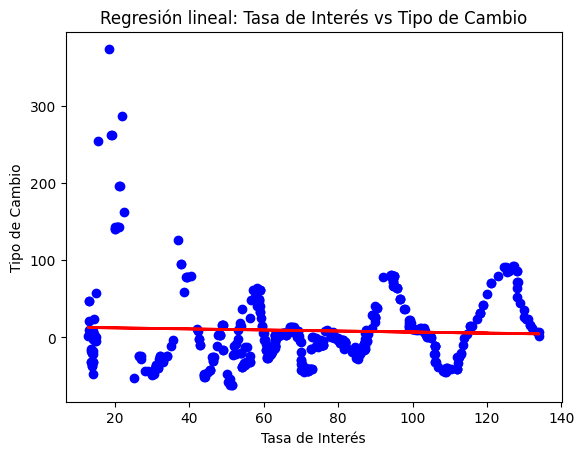

In [22]:
# Graficamos regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión lineal: Tasa de Interés vs Tipo de Cambio')
plt.xlabel('Tasa de Interés')
plt.ylabel('Tipo de Cambio')
plt.show()

Crear tres regresiones lineales: 3. tipo_de_cambio ~ inflacion

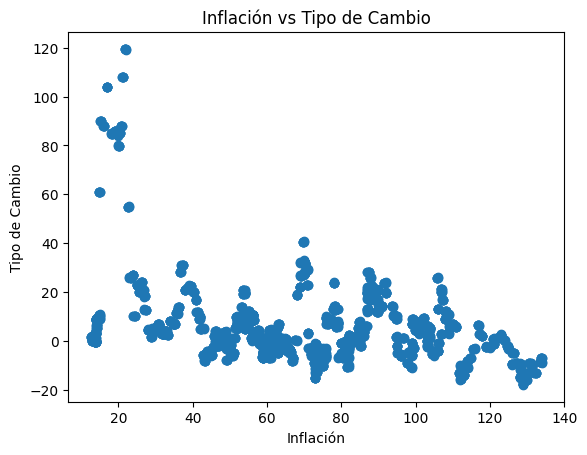

In [23]:
# Graficamos 'inflacion' vs 'tipo_de_cambio'
plt.scatter(tbl_unificadas['inflacion'], tbl_unificadas['tipo_de_cambio'])
plt.title('Inflación vs Tipo de Cambio')
plt.xlabel('Inflación')
plt.ylabel('Tipo de Cambio')
plt.show()

In [24]:
# Separamos datos en train y test sets
X = tbl_unificadas[['inflacion']]
y = tbl_unificadas['tipo_de_cambio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1304)

In [25]:
# Ajustamos modelos
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 294.641563519773
R^2 Score: 0.1401388474809112


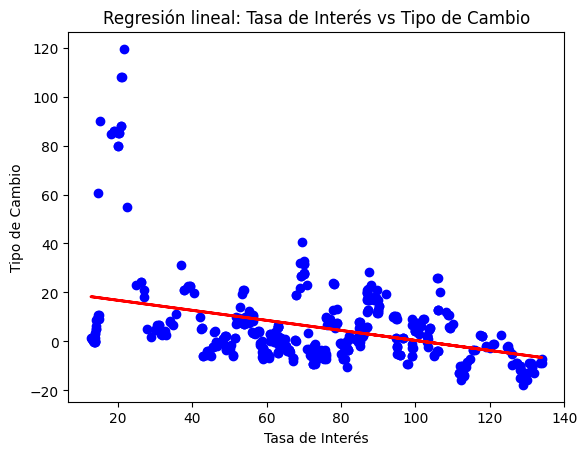

In [26]:
# Graficamos regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión lineal: Tasa de Interés vs Tipo de Cambio')
plt.xlabel('Tasa de Interés')
plt.ylabel('Tipo de Cambio')
plt.show()